# Übungsblatt 2: Kleinste Quadrate

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
plt.style.use('ggplot')
%matplotlib inline
from functools import partial

---
## Aufgabe 1
Betrachten Sie $y_k, k=1,2,\dots,10$ Poisson-verteilte Messwerte um die Erwartungswerte $\mu_k = a\cdot k$. Der Parameter $a$ soll mit der Methode der kleinsten Quadrate geschätzt werden. Betrachten Sie dazu die folgenden $\chi^2$-Funktionen:

$$\chi^2 = \sum_{k=1}^{10} w_k (y_k - ak)^2 \quad\text{mit}\quad w_k\in \left\{1, \frac{1}{y_k}, \frac{1}{ak}, \frac{1}{k}, \frac{1}{a_{n-1}k} \right\}$$

### 1.1
Bestimmen Sie analytisch die Schätzwerte $\hat{a}$ als Funktion der $y_k$, welche die entsprechenden $\chi^2$-Funktion minimieren.

---

Für den Fall $w_k = 1$ ist
\begin{align}
    \chi^2 &= \sum_k\left(y_k - a k\right)^2 \\
           &= \sum_k y_k^2 - 2 y_k a k + a^2 k^2 \\
    \frac{\partial\chi^2}{\partial a} &= -2\sum_k y_k k + 2\sum_k a k^2 \overset{!}{=} 0 \\
    &\Rightarrow a \sum_k k^2 = \sum_k y_k k \\
    &\Rightarrow a = \frac{\sum_k y_k k}{\sum_k k^2}
\end{align}

Für den Fall $w_k = 1 / y_k$ ist
\begin{align}
    \chi^2 &= \sum_k \frac{y_k^2 - 2 y_k a k + a^2 k^2}{y_k} \\
           &= \sum_k y_k - 2 a k + \frac{a^2 k^2}{y_k} \\
    \frac{\partial\chi^2}{\partial a} &= -2\sum_k k + 2a\sum_k \frac{k^2}{y_k} \overset{!}{=} 0 \\
    &\Rightarrow a \sum_k \frac{k^2}{y_k} = \sum_k k \\
    &\Rightarrow a = \frac{\sum_k k}{\sum_k \frac{k^2}{y_k}}
\end{align}

Für den Fall $w_k = 1 / ak$ ist
\begin{align}
    \chi^2 &= \sum_k \frac{y_k^2 - 2 y_k a k + a^2 k^2}{ak} \\
           &= \sum_k \frac{y_k^2}{ak} - 2y_k + ak \\
    \frac{\partial\chi^2}{\partial a} &= -\frac{1}{a^2}\sum_k \frac{y_k^2}{k} + \sum_k k \overset{!}{=} 0 \\
    &\Rightarrow a^2 = \frac{\sum_k \frac{y_k^2}{k}}{\sum_k k} \\
    &\Rightarrow a = \sqrt{\frac{\sum_k \frac{y_k^2}{k}}{\sum_k k}}
\end{align}

Für den Fall $w_k = 1 / k$ ist
\begin{align}
    \chi^2 &= \sum_k \frac{y_k^2 - 2 y_k a k + a^2 k^2}{k} \\
           &= \sum_k \frac{y_k^2}{k} - 2ay_k + a^2k \\
    \frac{\partial\chi^2}{\partial a} &= -2\sum_k y_k + 2a\sum_k k \overset{!}{=} 0 \\
    &\Rightarrow a\sum_k k = \sum_k y_k \\
    &\Rightarrow a = \frac{\sum_k y_k}{\sum_k k}
\end{align}

Für den Fall $w_k = 1 / a_{n-1} k$ ist
\begin{align}
    \chi^2 &= \sum_k \frac{y_k^2 - 2 y_k a k + a^2 k^2}{a_{n-1}k} \\
           &= \sum_k \frac{y_k^2}{a_{n-1}k} - \frac{2ay_k}{a_{n-1}} + \frac{a^2k}{a_{n-1}} \\
    \frac{\partial\chi^2}{\partial a} &= -\frac{2}{a_{n-1}}\sum_k y_k + 2\frac{a}{a_{n-1}}\sum_k k \overset{!}{=} 0 \\
    &\Rightarrow \frac{a}{a_{n-1}}\sum_k k = \frac{1}{a_{n-1}}\sum_k y_k \\
    &\Rightarrow a = \frac{\sum_k y_k}{\sum_k k}
\end{align}


Das bedeutet also, dass die Minimierung in diesem Fall im ersten Schritt konvergiert und eine Iteration keine Verbesserung liefert.

---
### 1.2
Bestimmen Sie mittels Monte Carlo die Verteilungen der verschiedenen Schätzwerte $\hat{a}$.

---

[ 50  84 111 199 195 233 287 328 364 412]


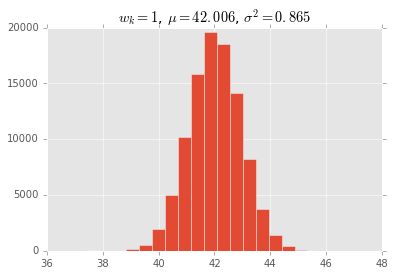

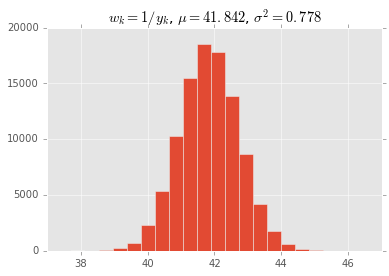

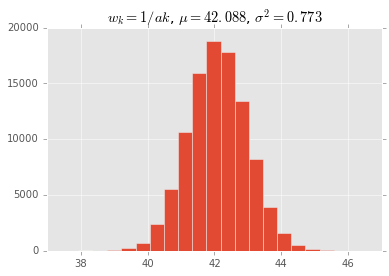

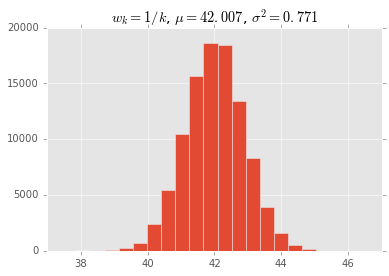

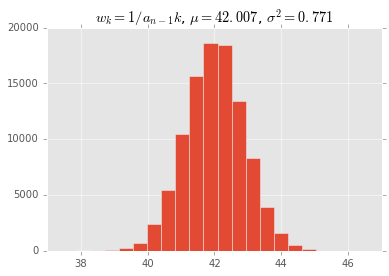

In [20]:
def generate_sample(a, n=10, size=100000):
    ks = np.arange(1, n + 1)
    yss = np.random.poisson(a * ks, size=(size, n)) #ziehe 100k mal 10 poissonzahlen
    return ks, yss


a = 42
ks, yss = generate_sample(a)
print(yss[1])
estimators = [
    #lambda: anonyme funktionen, Beispiel: a = lambda x : 2x; a(2) gibt dann 4 zurück
    ('1', lambda xs, ys: np.sum(ys * xs) / np.sum(xs ** 2)),
    ('1/y_k', lambda xs, ys: np.sum(xs) / np.sum(xs ** 2 / (ys))), #für kleine a geht das auch schonmal schief(durch ys=0)
    ('1/ak', lambda xs, ys: np.sqrt(np.sum(ys ** 2 / xs) / np.sum(xs))),
    ('1/k', lambda xs, ys: np.sum(ys) / np.sum(xs)),
    ('1/a_{n-1}k', lambda xs, ys: np.sum(ys) / np.sum(xs))
]

for w, wf in estimators:
    as_ = np.array([wf(ks, ys) for ys in yss])
    mean = np.mean(as_)
    var = np.var(as_)
    plt.hist(as_, bins=20)
    plt.title('$w_k = {}$, $\mu = {:.3f}$, $\sigma^2 = {:.3f}$'.format(w, mean, var))
    plt.show()

---
## Aufgabe 2
Betrachten Sie ein Histogramm mit 10 Bins im Bereich $[0,1]$. Generieren Sie eine Poisson-verteilte Zufallszahl $N$ mit Mittelwert $\langle N\rangle = 400$, und füllen Sie das Histogramm mit $N$ Zufallszahlen die Sie gemäß

$$x = \frac{1}{2}\left(\sqrt{1 + 8z} - 1\right)$$

erzeugen, wobei $z$ gleichverteilt im Intervall $[0, 1]$ ist. Die Theorie sagt voraus, dass $x$ gemäß einer Wahrscheinlichkeitsdichte

$$ \rho(x) = \frac{1 + \alpha x}{1 + \alpha/2}$$

verteilt ist.

---

375


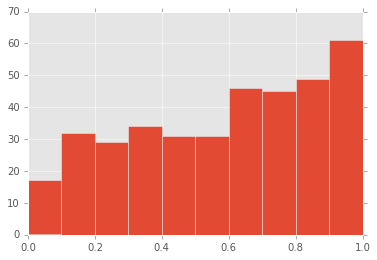

In [21]:
def transform_x(z):
    return 1 / 2 * (np.sqrt(1 + 8 * z) - 1)


N = np.random.poisson(400)
print(N)
xs = transform_x(np.random.uniform(size=N))
ns, bins, _ = plt.hist(xs, range=(0, 1), bins=10)
plt.show()

---
Bestimmen sie mit der Methode der kleinsten Quadrate einen Schätzwert für $\alpha$. Nehmen Sie dazu an, dass die Anzahl der Einträge in jedem Bin Poisson-verteilt um ihren Erwartungswert streut. Beschreiben Sie die Daten durch eine lineare Funktion $y = a_0 + a_1x$, bestimmen Sie $a_0$ und $a_1$ und deren Kovarianzmatrix, und berechnen Sie daraus $\alpha(a_0, a_1)$ sowie dessen Unsicherheit. Gehen Sie beim Fit folgendermassen vor:

* Berechnen Sie die erwartete Zahl von Einträgen für alle Bins.
* Benutzen Sie diese zur Formulierung der $\chi^2$-Funktion.
* Minimieren Sie diese iterativ. Verwenden Sie im ersten Schritt für alle Bins konstante Gewichte $w_k = 1$, und danach als Gewicht $w_k = 1/V_k$, wobei $V_k$ die mit den Parametern aus dem vorhergehenden Fit abgeschätzte Varianz im Bin $k$ ist.

---

Mit Hilfe der PDF können wir die Anzahl erwarteter Einträge $T_k$ im $k$-ten Bin berechnen. Es ist

\begin{equation}
    T_k(\alpha) = N \int_{x_k}^{x_{k+1}} \mathrm{d}x\, \rho(x) = \frac{N}{1 + \alpha/2}\bigl( x_{k+1} - x_{k} + \frac{1}{2}\alpha(x_{k+1}^2 - x_k^2) \bigr) \,.
\end{equation}

Damit können wir unser $\chi^2$ formulieren.

\begin{equation}
    \chi^2(\alpha) = \sum_k w_k \left(n_k - T_k(\alpha)\right)^2
\end{equation}

wobei $n_k$ die beobachtete Anzahl Einträge im $k$-ten Bin ist. Wir könnten jetzt hergehen und die Funktion händisch ableiten, um unseren Schätzer zu erhalten. Um uns das Leben etwas zu vereinfachen verwenden wir die `minimize`-Funktion aus `scipy.optimize`.

In [22]:
def expected_ns(N, bins, alpha):
    widths = bins[1:] - bins[:-1] #das gibt die abstände zwischen den bins
    sqdiff = bins[1:] ** 2 - bins[:-1] ** 2 #für T_k benötigt
    return N / (1 + alpha / 2) * (widths + alpha / 2 * sqdiff)


tk = partial(expected_ns, N, bins)


def chi2(N, bins, ns, ws, alpha):
    ts = expected_ns(N, bins, alpha)
    return np.sum(ws * (ns - ts) ** 2)


c2 = partial(chi2, N, bins, ns, 1)
alpha = scipy.optimize.minimize(c2, 1)
#print(alpha)
alpha = alpha.x[0]
#konvergiert die iteration?
for _ in range(5):
    #iterative weights
    ws = 1 / expected_ns(N, bins, alpha)
    c2 = partial(chi2, N, bins, ns, ws)
    alpha = scipy.optimize.minimize(c2, [alpha]).x[0]
    print(alpha)

1.96380493358
1.96469850661
1.9646906935
1.9646906935
1.9646906935


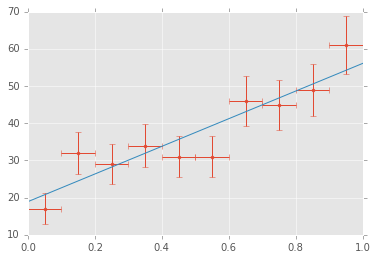

In [23]:
#den fit kann man ja mal plotten
widths = bins[1:] - bins[:-1]
centres = bins[:-1] + widths / 2
plt.errorbar(centres, ns, xerr=widths / 2, yerr=np.sqrt(ns), fmt='.')


def rho(x):
    return (1 + alpha * x) / (1 + alpha / 2)


xs_ = np.linspace(0, 1, 2)
plt.plot(xs_, N * widths[0] * rho(xs_))
plt.show()

---
Wiederholen Sie die Fits mit unabhängigen Datensätzen und bestimmen Sie die Verteilung von $\alpha$. Variieren Sie die Methode, indem Sie den Fit nicht iterieren oder andere Gewichtsfunktionen benutzen.

---

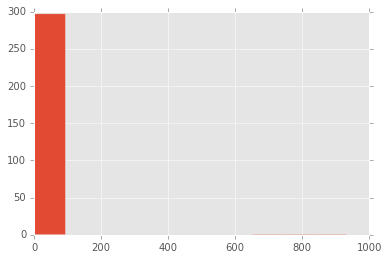

mean = 10.129312613507789
variance = 6467.329743334084


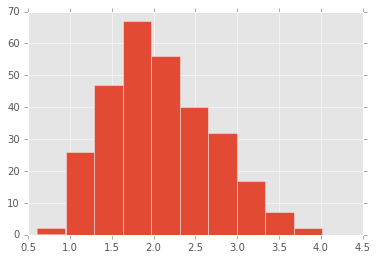

mean = 2.0743824396816635
variance = 0.38639078726522363


In [25]:
def fit_alpha(N, xs, iterations=5):
    ns, bins = np.histogram(xs, range=(0, 1), bins=10)
    c2 = partial(chi2, N, bins, ns, 1)

    alpha = scipy.optimize.minimize(c2, [1]).x[0]

    for _ in range(iterations):
        #ws = 1 / expected_ns(N, bins, alpha)
        ws = 1
        c2 = partial(chi2, N, bins, ns, ws)
        alpha = scipy.optimize.minimize(c2, [alpha]).x[0]   
    return alpha


def generate_sample(mean_N=400):
    N = np.random.poisson(mean_N)
    xs = transform_x(np.random.uniform(size=N))
    return N, xs


alphas = np.array([fit_alpha(*generate_sample()) for _ in range(300)])
plt.hist(alphas)
plt.show()
print('mean = {}'.format(np.mean(alphas)))
print('variance = {}'.format(np.var(alphas)))

alphas = alphas[np.logical_and(-5 < alphas, alphas < 5)]
plt.hist(alphas)
plt.show()
print('mean = {}'.format(np.mean(alphas)))
print('variance = {}'.format(np.var(alphas)))

### Alternative Lösung ohne Verwendung von `scipy.optimize`

Wir können unser $T_k$ auch als lineares Modell zweier Parameter $a_0$ und $a_1$ ausdrücken, indem wir zwei Variablen $p_k$ und $q_k$ einführen die definiert sind als

\begin{align}
    p_k &= x_{k + 1} - x_k \,\text{und} \\
    q_k &= \frac{1}{2}(x_{k + 1}^2 - x_k^2) \,.
\end{align}

Damit ist

\begin{equation}
    T_k(a_0, a_1) = a_0 p_k + a_1 q_k
\end{equation}

Damit können wir zur Minimierung des $\chi^2$ die analytische Lösung für lineare Modelle verwenden. Als Designmatrix $X$ verwenden wir

\begin{equation}
    X = \pmatrix{p_1 & q_1 \\
                 \vdots & \vdots \\
                 p_k & q_k}
\end{equation}

und erhalten

\begin{equation}
    \mathbf{\hat{a}} = (X^T W X)^{-1} X^T W y
\end{equation}

wobei $W$ die Gewichtsmatrix ist. Um $\hat{a}$ iterativ zu berechnen, verwenden wir

\begin{equation}
    \mathbf{\hat{a}^{(n+1)}} = (X^T W^{(n)} X)^{-1} X^T W^{(n)} y
\end{equation}

wobei

\begin{equation}
    W^{(n)} = \frac{1}{{\hat{a}_0^{(n)}p_k + \hat{a}_1^{(n)}q_k}} \mathbb{1} \,.
\end{equation}

In [ ]:
def prepare_xs(xs):
    y, bins = np.histogram(xs)
    ps = bins[1:] - bins[:-1]
    qs = (bins[1:] ** 2 - bins[:-1] ** 2) / 2
    X = np.matrix([ps, qs]).T
    return np.matrix(y).T, X


def regression(y, X, W=None):
    if W is None:
        W = np.identity(X.shape[0])
    a = (X.T * W * X).I * X.T * W * y
    W = (np.diag(np.array(1 / (X * a))[:,0]))
    return a, W

N, xs = generate_sample()
y, X = prepare_xs(xs)
I = np.identity(np.shape(X)[0])

a, W = regression(y, X)
print(a)
for _ in range(10):
    a, W = regression(y, X, W)
    print(a)

Jetzt müssen wir nur noch $\alpha$ aus $a_0$ und $a_1$ bestimmen.


In [8]:
a0, a1 = a

alpha = a1 / a0
alpha

matrix([[ 2.18336416]])